<a href="https://colab.research.google.com/github/Sai-Himaja/hello-world/blob/main/TASK1_TSF_INTERNSHIP_PREDICTION_MARKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Prediction using supervised ML
Problem: Predict the percentage of students based on the no study hours.
Author: Sai Himaja
Data set:https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
origin= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data_frame= pd.read_csv(origin)
#observing the data
data_frame.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data_frame.describe()   
# gives the mean, standard_dev, minima, maxima
  

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data_frame.isnull()
#detects missing values

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
data_frame.isnull().sum()

Hours     0
Scores    0
dtype: int64

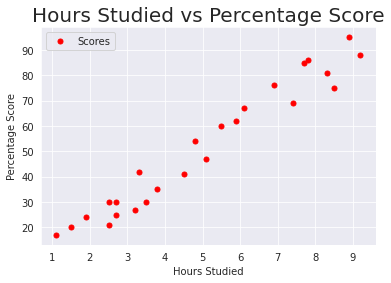

In [ ]:
sns.set_style('darkgrid')
#sns.scatterplot(y=data_frame['Scores'],x=data_frame['Hours'])
data_frame.plot(x='Hours', y='Scores', style='.', color='red', markersize=10)
plt.title('Hours Studied vs Percentage Score',size=20)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

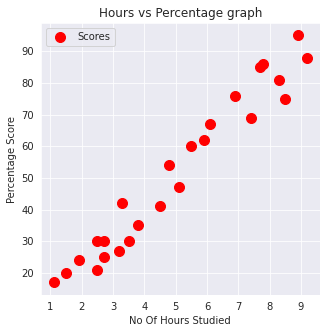

In [ ]:
plt.rcParams["figure.figsize"] = [5,5]
data_frame.plot(x='Hours', y='Scores', style='.', color='red', markersize=20)
plt.title('Hours vs Percentage graph')  
plt.xlabel('No Of Hours Studied')  
plt.ylabel('Percentage Score')  
sns.set_style('darkgrid')
plt.show()

Data preparation
Using iloc function:

In [ ]:
#suppose if we have to retrive 2nd row and 1 colume i.e 5.1 
z=data_frame.iloc[1:2 ,0:1].values
x = data_frame.iloc[:, 0:1].values  # to get first column
y = data_frame.iloc[:, 1:].values# to get 2nd column

In [ ]:
z

array([[5.1]])

In [ ]:

# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0)


In [ ]:

from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

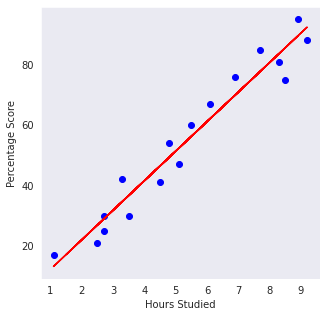

In [ ]:

line = model.coef_*x + model.intercept_

# Plotting for the training data

plt.rcParams["figure.figsize"] = [5,5] # 10*5 is size of graph
plt.scatter(x_train, y_train, color='blue')
plt.plot(x, line, color='red')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

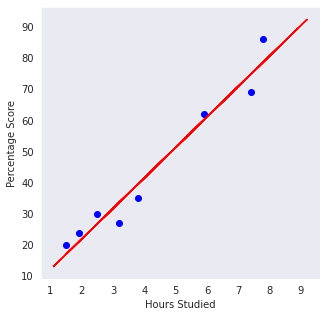

In [ ]:
# Plotting for the testing data

plt.rcParams["figure.figsize"] = [5,5] 
plt.scatter(x_test, y_test, color='blue')
plt.plot(x, line, color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

In [ ]:
print(x_test)
y_pred=model.predict(x_test)
y_act=model.predict(x)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [ ]:
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [ ]:
# COmpare actual data vs predicted one
Compare= pd.DataFrame({'Actual': [y_test], 'Predicted':[y_pred]})
Compare

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.053665412465456], [33.69422877993883], [7..."


In [ ]:
# Testing with given data
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [92.91505723]


In [ ]:
#evaluating the result
from sklearn import metrics
Abs_error= metrics.mean_absolute_error(y_test, y_pred)
print("Mean absolute error is",  Abs_error)

Mean absolute error is 4.419727808027651


In [ ]:
from google.colab import drive
drive.mount('/content/drive')